In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
#Loading the data 
airports = pd.read_csv("data/Airport_Codes.csv")
flights = pd.read_csv("data/Flights.csv")
tickets = pd.read_csv("data/Tickets.csv")

/var/folders/5s/bzn_bky51k3bk9glk6bcxst40000gn/T/ipykernel_2109/2421099343.py:3: DtypeWarning: Columns (3,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  flights = pd.read_csv("data/Flights.csv")


In [69]:
#Exploratory Data Analysis

print("Shape of Airport_Code"+str(airports.shape))
print("Shape of Flights"+str(flights.shape))
print("Shape of tickets"+str(tickets.shape))

Shape of Airport_Code(55369, 8)
Shape of Flights(1915886, 16)
Shape of tickets(1167285, 12)


In [70]:
airports.columns

Index(['TYPE', 'NAME', 'ELEVATION_FT', 'CONTINENT', 'ISO_COUNTRY',
       'MUNICIPALITY', 'IATA_CODE', 'COORDINATES'],
      dtype='object')

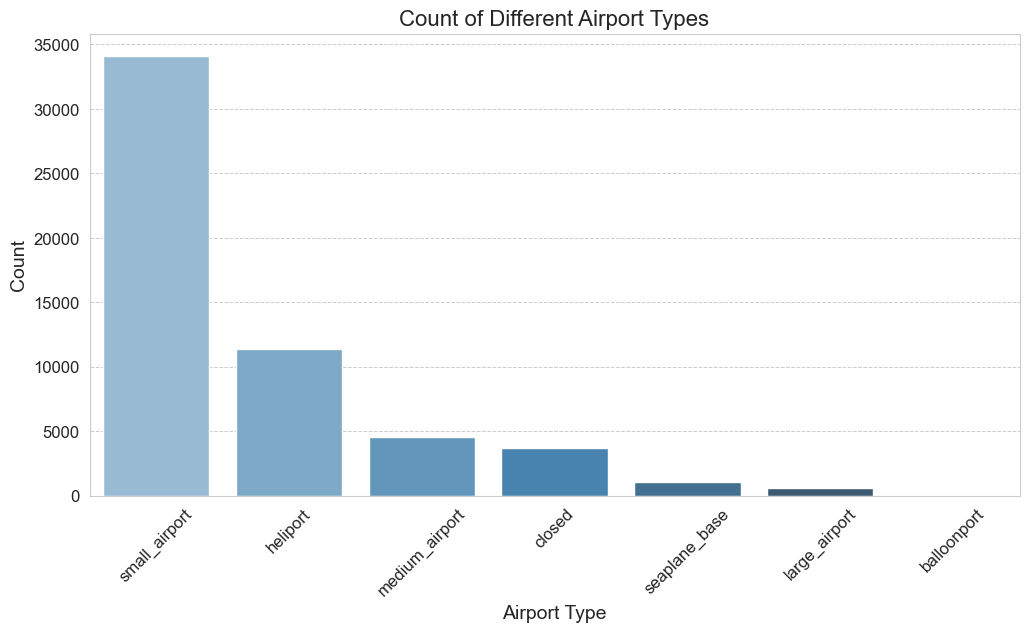

In [71]:
# Visualizing number of different types of airports 
# Group by TYPE and count the occurrences
type_counts = airports['TYPE'].value_counts().reset_index()
type_counts.columns = ['TYPE', 'COUNT']

# Plot the bar graph
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.barplot(x='TYPE', y='COUNT', data=type_counts, palette='Blues_d')
plt.title('Count of Different Airport Types', fontsize=16)
plt.xlabel('Airport Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()

In [72]:
#Only choosing airports which are medium and large sized
valid_airports = airports[airports['TYPE'].isin(['medium_airport', 'large_airport'])]

#Only choosing relevant coloumns
valid_airports = valid_airports[["TYPE","NAME","IATA_CODE"]]

print(valid_airports.isna().sum())

#Removing rows with IATA_CODE empty
valid_airports = valid_airports.dropna(subset=['IATA_CODE'])


TYPE           0
NAME           0
IATA_CODE    687
dtype: int64


In [56]:
valid_airports.to_csv("valid_airports.csv")


In [57]:
#Removing cancelled flights rows

valid_flights = flights.dropna(subset=['CANCELLED'])
valid_flights = flights[flights['CANCELLED'] == 0]
print("Total Number of flights "+str(flights.shape))
print("Number of flights after removing cancelled flights "+str(valid_flights.shape))

#checking for duplicate values and removing them
print("Number of duplicate flight rows "+str(valid_flights.duplicated().sum()))
valid_flights = valid_flights.drop_duplicates()
print("Number of flights are removing duplicates"+str(valid_flights.shape))

Total Number of flights (1915886, 16)
Number of flights after removing cancelled flights (1864272, 16)
Number of duplicate flight rows 4410
Number of flights are removing duplicates(1859862, 16)


In [58]:
#Only choosing relevant column names
valid_flights = valid_flights[["ORIGIN","DESTINATION","DEP_DELAY","ARR_DELAY","CANCELLED","DISTANCE","OCCUPANCY_RATE"]]


In [59]:
# Create a list of valid IATA codes of medium and large airports
valid_iata_codes = valid_airports['IATA_CODE'].dropna().unique()

# Filter valid flights which belong to medium and large airports and dropping the rest
valid_flights = valid_flights[
    (valid_flights['ORIGIN'].isin(valid_iata_codes)) &
    (valid_flights['DESTINATION'].isin(valid_iata_codes))
]

In [60]:
valid_flights.shape

(1845322, 7)

In [61]:
#Finding Top 10 busiest routes from flights data

#Calculating number of flights for each origin and destination by grouping them
busiest_routes_flights_data = valid_flights.groupby(['ORIGIN', 'DESTINATION']).size().reset_index(name='total_flights')

In [62]:
busiest_routes_flights_data

,ORIGIN,DESTINATION,total_flights
0,ABE,ATL,217
1,ABE,CLT,251
2,ABE,DTW,248
3,ABE,FLL,20
4,ABE,ORD,159
...,...,...,...
5726,YAK,CDV,83
5727,YAK,JNU,88
5728,YKM,SEA,305
5729,YUM,DFW,28


/Users/tanmaybhardwaj/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


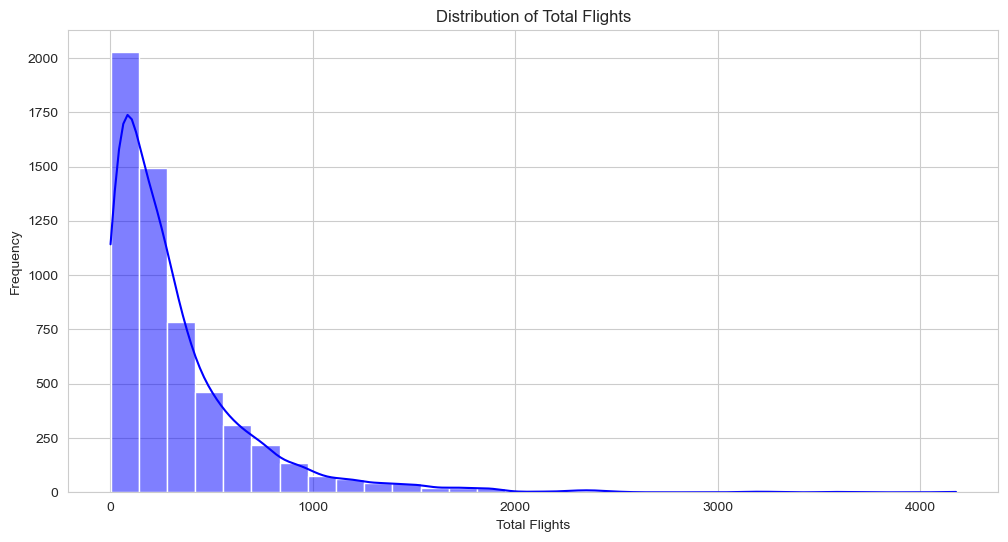

In [63]:
# Add a histogram for total flights
plt.figure(figsize=(12, 6))
sns.histplot(busiest_routes_flights_data['total_flights'], bins=30, kde=True, color='blue')
plt.title('Distribution of Total Flights')
plt.xlabel('Total Flights')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [64]:
busiest_routes_flights_data.to_csv("Busiest_routes_flights.csv")

In [65]:
# Bar plot for top 10 busiest routes by total flights

# Create a ROUTE column by concatenating ORIGIN and DESTINATION
busiest_routes_flights_data['ROUTE'] = busiest_routes_flights_data['ORIGIN'] + '-' + busiest_routes_flights_data['DESTINATION']
# Find the top 10 busiest routes by total flights
top_10_busiest_routes = busiest_routes_flights_data.nlargest(10, 'total_flights')


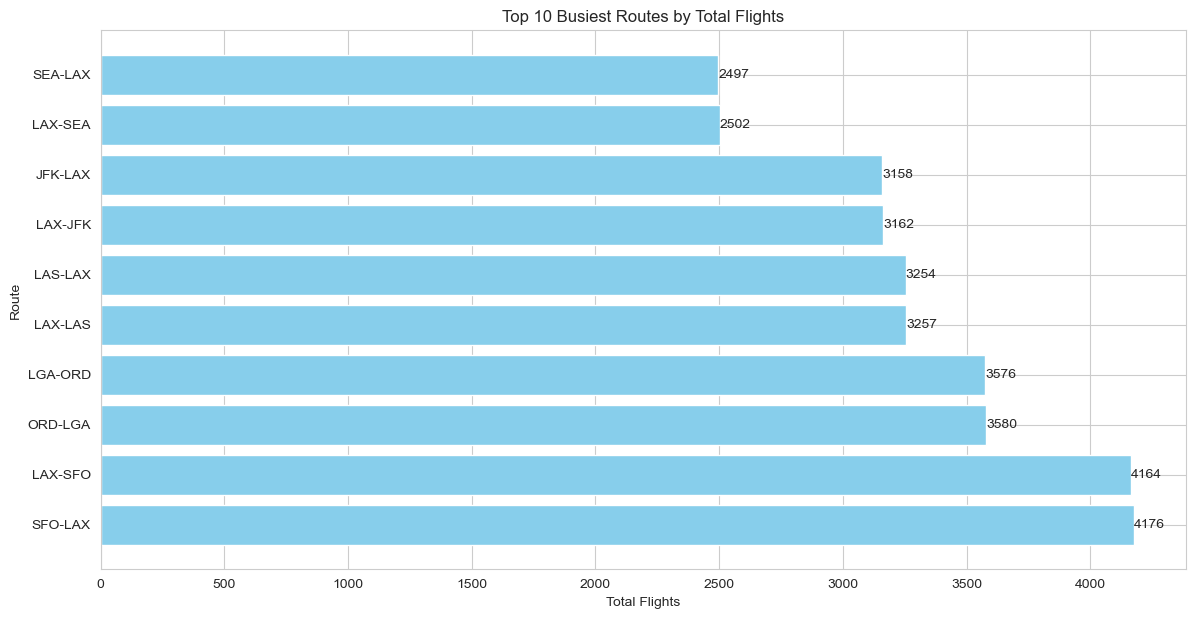

In [66]:
# Plot the horizontal bar graph
plt.figure(figsize=(14, 7))
colors = sns.color_palette('viridis', len(top_10_busiest_routes))
bars = plt.barh(top_10_busiest_routes['ROUTE'], top_10_busiest_routes['total_flights'], color='skyblue')
plt.title('Top 10 Busiest Routes by Total Flights')
plt.xlabel('Total Flights')
plt.ylabel('Route')
plt.grid(True)

# Add the total_flights number at the end of each bar
for bar in bars:
    plt.text(
        bar.get_width(),
        bar.get_y() + bar.get_height() / 2,
        f'{bar.get_width()}',
        va='center',
        ha='left'
    )

plt.show()